# Fisheries Monitoring

Kaggle competition: https://www.kaggle.com/c/the-nature-conservancy-fisheries-monitoring

In this notebook, we will train a CNN by augmenting the training images

In [82]:
import importlib
import utils; importlib.reload(utils)
from utils import *
%matplotlib inline

In [2]:
path = "F:/fishery_monitoring/"

# Augmenting the training images

In [3]:
#image augmentation
augmenter = image.ImageDataGenerator(rotation_range=10, width_shift_range=0.05, 
                                     height_shift_range=0.05, zoom_range=0.05,
                                     horizontal_flip=True)

In [4]:
batch_size = 64
batches = get_batches(path+'train', batch_size=batch_size, gen = augmenter)
val_batches = get_batches(path+'valid', batch_size=batch_size, shuffle=False)                                                

Found 3277 images belonging to 8 classes.
Found 500 images belonging to 8 classes.


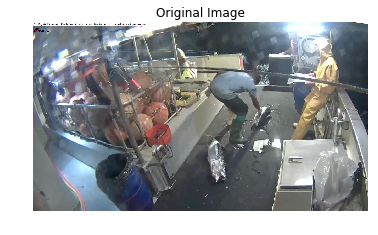

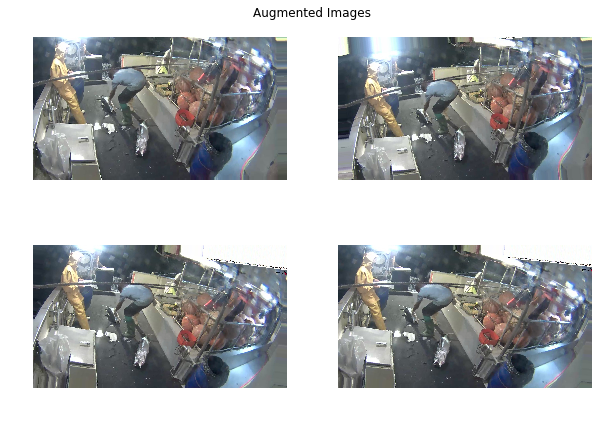

In [16]:
#look at some example of augmented images
num_samples = 4
rows = 2

img_path = path + 'train/ALB/' + os.listdir(path+'train/ALB')[1]
img = np.expand_dims(ndimage.imread(img_path),0)

aug_iter = augmenter.flow(img)
aug_imgs = [next(aug_iter)[0].astype(np.uint8) for i in range(num_samples)]

plt.imshow(img[0])
plt.title('Original Image')
plt.axis('Off')

aug_plots = plt.figure(figsize = (10,7))
plt.title('Augmented Images')
plt.axis('Off')
for i in range(num_samples):
    sp = aug_plots.add_subplot(rows, num_samples//rows, i+1)
    sp.axis('Off')
    plt.imshow(aug_imgs[i])

# Defining the CNN

In [17]:
#dropout probability
p = 0.6

layers = [
    BatchNormalization(axis=1, input_shape=(224,224,3)),

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(axis=1),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(axis=1),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(axis=1),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(axis=1),

    #Conv2D(512, (3, 3), activation='relu', padding='same'),
    #BatchNormalization(axis=1),
    #Conv2D(512, (3, 3), activation='relu', padding='same'),
    #BatchNormalization(axis=1),
    #MaxPooling2D(pool_size=(2, 2)),
    Dropout(p/2),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(p),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(p/2),
    Dense(8, activation='softmax')
]

In [18]:
model = Sequential(layers)
model.compile(Adam(lr=0.001), 
              loss = 'categorical_crossentropy', metrics=['accuracy'])
loss_list = []
val_loss_list = []

# Training

In [20]:
#initialize training with a few epochs at a small learning rate
model.optimizer.lr = 1e-5

model_fit = model.fit_generator(batches, steps_per_epoch = 50, 
                                validation_data = val_batches, 
                                validation_steps = 10, 
                                epochs = 2)
loss_list += model_fit.history['loss']
val_loss_list += model_fit.history['val_loss']

Epoch 1/2
50/50 [==============================] - 114s - loss: 2.7468 - acc: 0.1888 - val_loss: 2.1399 - val_acc: 0.0653

Epoch 1/10
50/50 [==============================] - 93s - loss: 2.2048 - acc: 0.3214 - val_loss: 2.0961 - val_acc: 0.1412

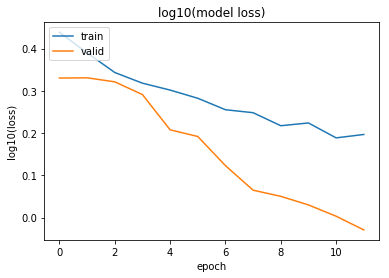

In [23]:
#continue training at a larger learning rate for 10 epochs
model.optimizer.lr = 1e-3

model_fit = model.fit_generator(batches, steps_per_epoch = 50, 
                                validation_data = val_batches, 
                                validation_steps = 10, 
                                epochs = 10)
loss_list += model_fit.history['loss']
val_loss_list += model_fit.history['val_loss']

plot_log_loss(loss_list, val_loss_list)

Epoch 1/10
50/50 [==============================] - 93s - loss: 1.5348 - acc: 0.5105 - val_loss: 0.8881 - val_acc: 0.7293

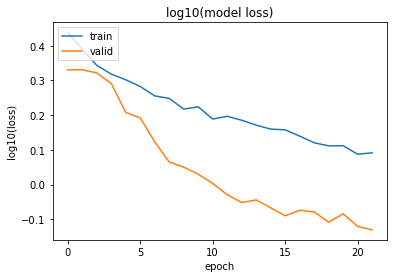

In [24]:
#another 10 epochs
model.optimizer.lr = 1e-3

model_fit = model.fit_generator(batches, steps_per_epoch = 50, 
                                validation_data = val_batches, 
                                validation_steps = 10, 
                                epochs = 10)
loss_list += model_fit.history['loss']
val_loss_list += model_fit.history['val_loss']

plot_log_loss(loss_list, val_loss_list)

Epoch 1/10
50/50 [==============================] - 109s - loss: 1.1762 - acc: 0.6202 - val_loss: 0.7723 - val_acc: 0.7675

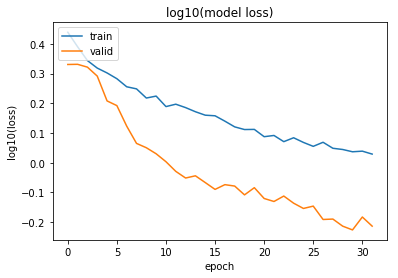

In [25]:
#looks like the validation loss is starting to stall
#let's reduce the learning rate and go another 10 epochs
model.optimizer.lr = 1e-4

model_fit = model.fit_generator(batches, steps_per_epoch = 50, 
                                validation_data = val_batches, 
                                validation_steps = 10, 
                                epochs = 10)
loss_list += model_fit.history['loss']
val_loss_list += model_fit.history['val_loss']

plot_log_loss(loss_list, val_loss_list)

Epoch 1/10
50/50 [==============================] - 101s - loss: 1.0300 - acc: 0.6850 - val_loss: 0.6053 - val_acc: 0.8201

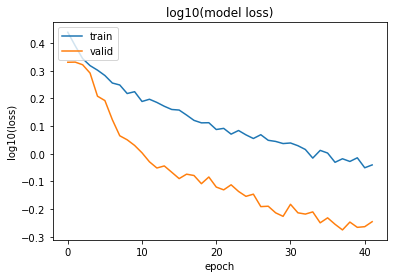

In [26]:
#let's reduce the learning rate again
model.optimizer.lr = 1e-5

model_fit = model.fit_generator(batches, steps_per_epoch = 50, 
                                validation_data = val_batches, 
                                validation_steps = 10, 
                                epochs = 10)
loss_list += model_fit.history['loss']
val_loss_list += model_fit.history['val_loss']

plot_log_loss(loss_list, val_loss_list)

epoch:  10 - loss: 0.8023 - val_loss: 0.4500
epoch:  20 - loss: 0.6636 - val_loss: 0.3831
epoch:  30 - loss: 0.5975 - val_loss: 0.3399
epoch:  40 - loss: 0.5567 - val_loss: 0.3259
epoch:  50 - loss: 0.4658 - val_loss: 0.2833
epoch:  60 - loss: 0.4315 - val_loss: 0.2547
epoch:  70 - loss: 0.4231 - val_loss: 0.2651
epoch:  80 - loss: 0.3636 - val_loss: 0.2449
epoch:  90 - loss: 0.3098 - val_loss: 0.2293
epoch: 100 - loss: 0.3213 - val_loss: 0.2165
epoch: 110 - loss: 0.2753 - val_loss: 0.2133
epoch: 120 - loss: 0.2689 - val_loss: 0.2052
epoch: 130 - loss: 0.2206 - val_loss: 0.2235


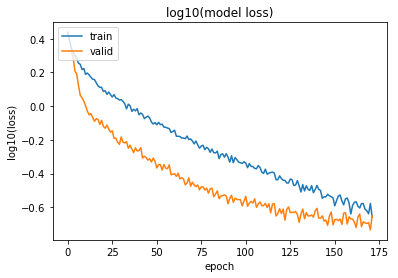

In [59]:
#let's reduce the learning rate one more time and train until the training loss drops below the validation loss
model.optimizer.lr = 1e-6
max_epochs = 300
epoch_count = 0

while (loss_list[-1] > val_loss_list[-1] and epoch_count < max_epochs):
    model_fit = model.fit_generator(batches, steps_per_epoch = 50, 
                                    validation_data = val_batches, 
                                    validation_steps = 10, 
                                    epochs = 1, 
                                    verbose = 0)
    loss_list += model_fit.history['loss']
    val_loss_list += model_fit.history['val_loss']
    epoch_count += 1
    
    if epoch_count % 10 == 0:
        print('epoch: ' + '{:3d}'.format(epoch_count) +
              ' - loss: ' + '{:0.4f}'.format(loss_list[-1]) +
              ' - val_loss: ' + '{:0.4f}'.format(val_loss_list[-1]))
        

plot_log_loss(loss_list, val_loss_list)

# Predictions

In [87]:
#get test data and make predictions
test_batches = get_batches(path+'test', shuffle = False, batch_size=1, class_mode=None, target_size=(224,224))
test_data = np.concatenate([test_batches.next() for i in range(test_batches.samples)])
test_filenames = list(map(lambda x: x.split('\\')[-1], test_batches.filenames))
test_preds = model.predict(test_data)

Found 1000 images belonging to 1 classes.


In [88]:
#clip data to avoid overconfidence
test_preds_clip = do_clip(test_preds,0.82)

In [90]:
#create dataframe of predictions and write to csv
test_preds_df = pd.DataFrame(test_preds_clip, columns = ["ALB","BET","DOL","LAG","NoF","OTHER","SHARK","YFT"])
test_preds_df['image'] = test_filenames 
test_preds_df.to_csv('out_aug.csv', index = False, 
                     columns = ["image","ALB","BET","DOL","LAG","NoF","OTHER","SHARK","YFT"])